In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Loading the data set
bc = pd.read_csv('Breast-Cancer.csv')
bc.dropna()
bc.shape

(569, 33)

In [3]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Describing the dataset
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
bc.apply(lambda x: x.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Data Cleaning

In [6]:
#Removing null valued columns

bc.drop('Unnamed: 32',axis=1, inplace=True)
bc.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Data Prepocessing 

In [7]:
#Converting the text 'diagnosis' to binary column
bc['diagnosis'] = np.where(bc['diagnosis']=='M', 1, 0)
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
bc['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

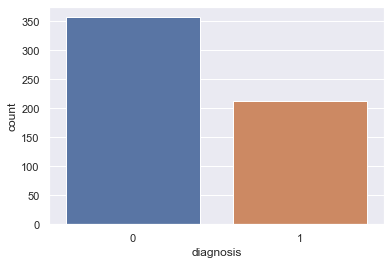

In [9]:
#The data is equally distributed to perform future operations without error
sns.countplot(bc['diagnosis'])

## Exploratory data analysis 

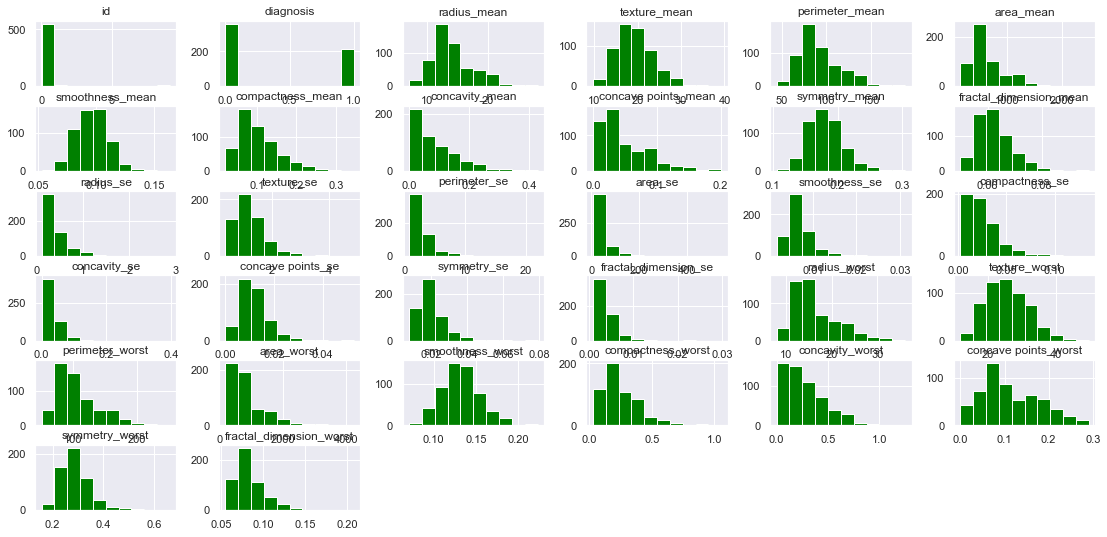

In [10]:
# Data Visualization for the Dataset
# Histogram for each numeric
bc.hist(figsize=(19,9), color="green")
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='Density'>

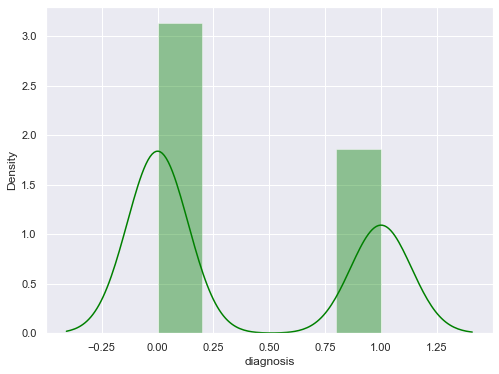

In [11]:
# Target Variable : Diagnosis
plt.figure(figsize = (8,6))
sns.distplot(bc['diagnosis'], color='green')

## Relation between diagnosis and other Categorical variables

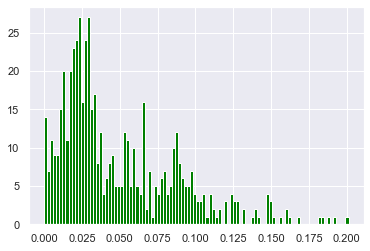

In [12]:
# diagnosis and concave points_mean
bc['concave points_mean'].hist(bins = 100, color='green')
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='area_worst'>

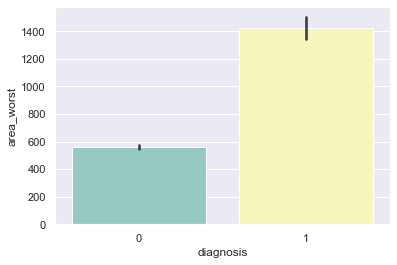

In [13]:
# diagnosis and area_worst

sns.barplot(x ='diagnosis', y='area_worst', data = bc, palette= 'Set3' )

Text(0, 0.5, 'Texture of the lump')

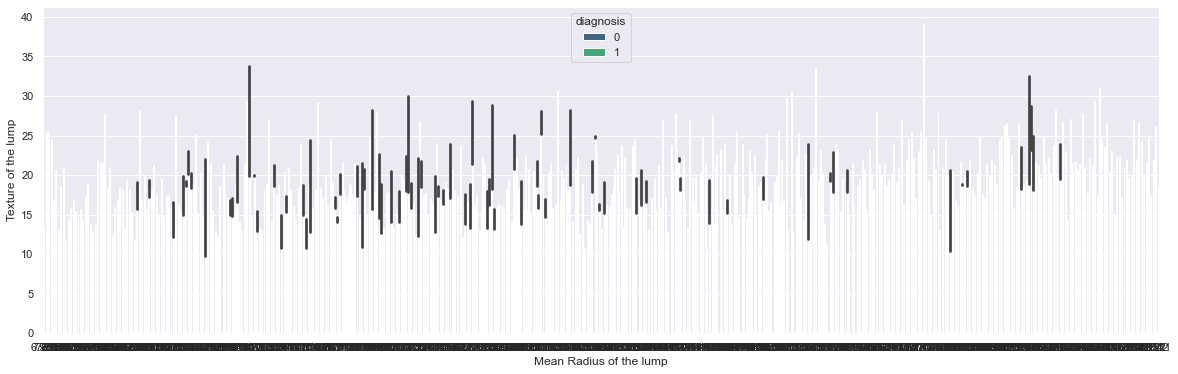

In [14]:
plt.figure(figsize =(20,6))
sns.barplot(x='radius_mean',y='texture_mean',data =bc, hue= 'diagnosis',palette='viridis')
plt.xlabel('Mean Radius of the lump')
plt.ylabel('Texture of the lump')

<AxesSubplot:xlabel='perimeter_worst', ylabel='area_worst'>

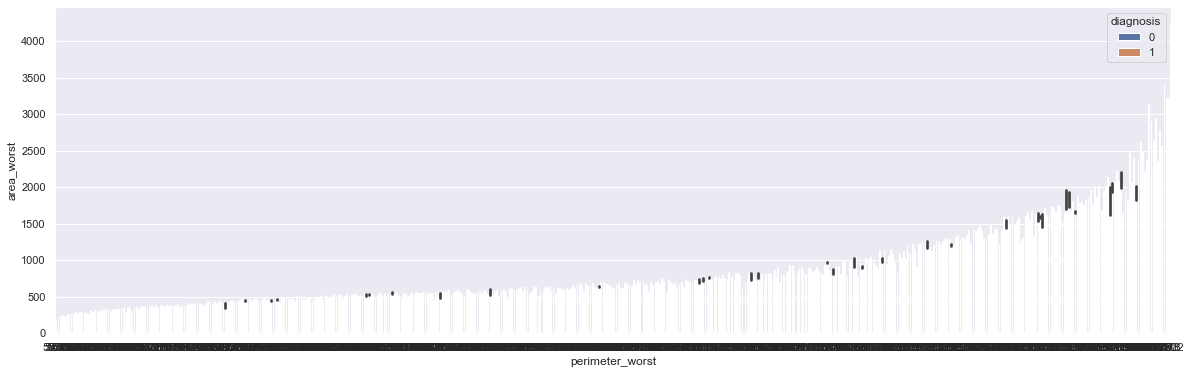

In [15]:
plt.figure(figsize =(20,6))
sns.barplot(x='perimeter_worst',y='area_worst',data =bc, hue= 'diagnosis')

<AxesSubplot:xlabel='texture_mean', ylabel='texture_worst'>

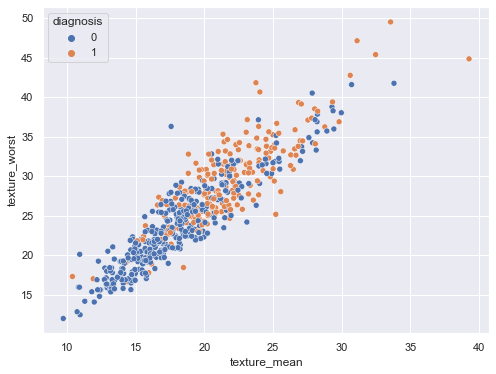

In [16]:
plt.figure(figsize =(8,6))
sns.scatterplot(x ='texture_mean', y = 'texture_worst', data = bc, hue ='diagnosis')

## Correlation Score 

<AxesSubplot:>

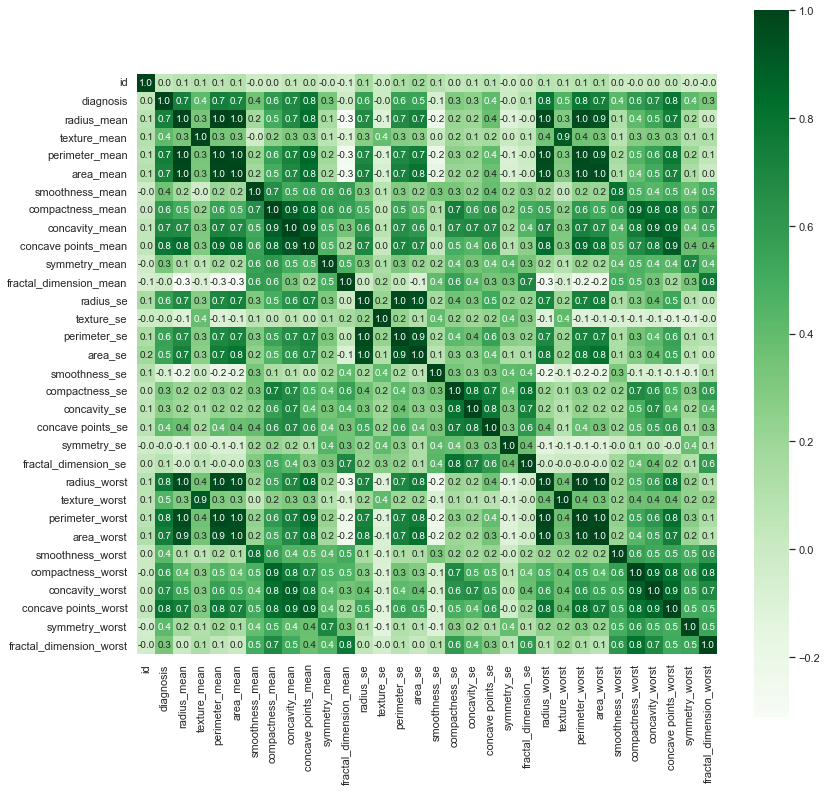

In [17]:
# Correlation matrix
corr  = bc.corr()
plt.figure(figsize = (13,13))
sns.heatmap(corr, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Greens')

## data set Test & Train splitting 

In [18]:
X = bc.drop(["diagnosis"], axis=1)  # dropping target feature from rest of features
Y = bc["diagnosis"]  

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## Using KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # By default K = 5
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [21]:
Y_pred = knn.predict(X_test)

In [22]:
knn.score(X_train,Y_train)

0.8417582417582418

In [23]:
knn.score(X_test,Y_test)

0.7543859649122807

## Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



<AxesSubplot:>

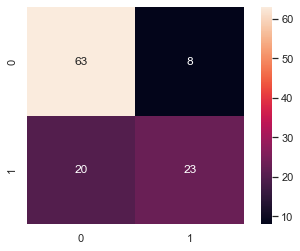

In [26]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,square=True,annot=True)

## Change K Value

In [27]:
error_rate = []
for i in range(1,40) :
    knn = KNeighborsClassifier (n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Minimum error:- 0.21052631578947367 at K = 1


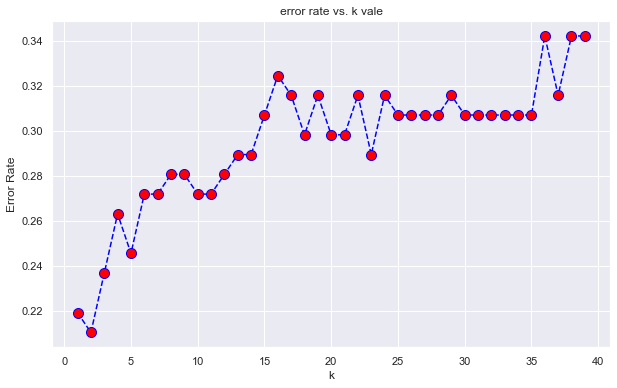

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',
         linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs. k vale')
plt.xlabel('k')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7894736842105263 at K = 1


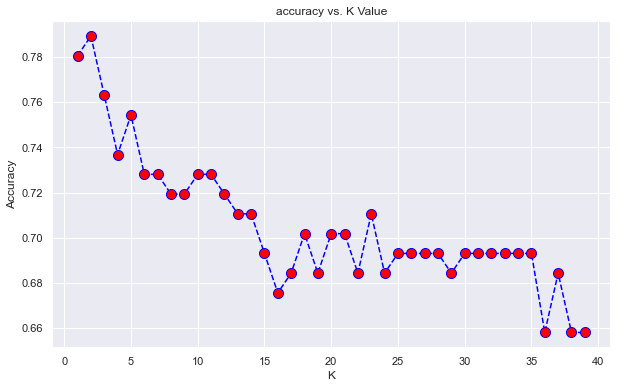

In [29]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [30]:
knn= KNeighborsClassifier(n_neighbors = 10)

In [31]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
Y_pred = knn.predict(X_test)

In [33]:
knn.score(X_train,Y_train)

0.7472527472527473

In [34]:
knn.score(X_test,Y_test)

0.7280701754385965

In [35]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [36]:
from sklearn.metrics import roc_curve

In [37]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
print('AUC: %.3f' % auc)

AUC: 0.730


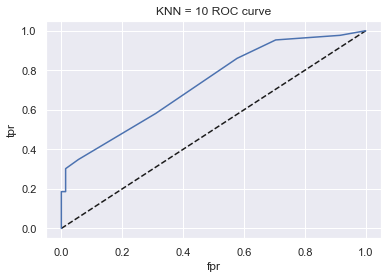

In [38]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN = 10 ROC curve')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

0.7296102194562726

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [42]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [43]:
knn_cv.best_score_

0.511566526936811

In [44]:
knn_cv.best_params_

{'n_neighbors': 48}

## Building KNN using Euclidean Distance and 10 neighbors

In [45]:
knn = KNeighborsClassifier(n_neighbors = 10, metric='minkowski', weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [46]:
Y_pred = knn.predict(X_train)

In [47]:
 print(classification_report(Y_pred, Y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



Maximum accuracy:- 0.7894736842105263 at K = 1


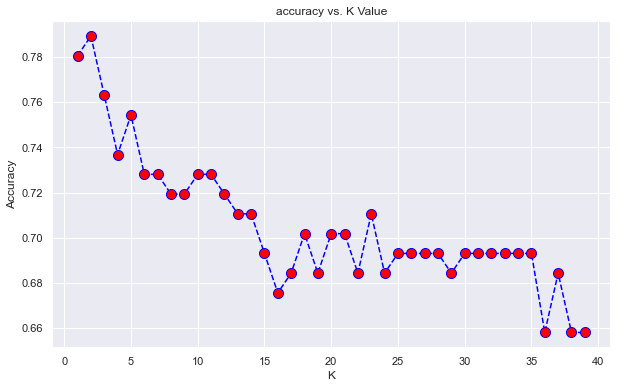

In [48]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## Outlier Detection and Finding best K Value

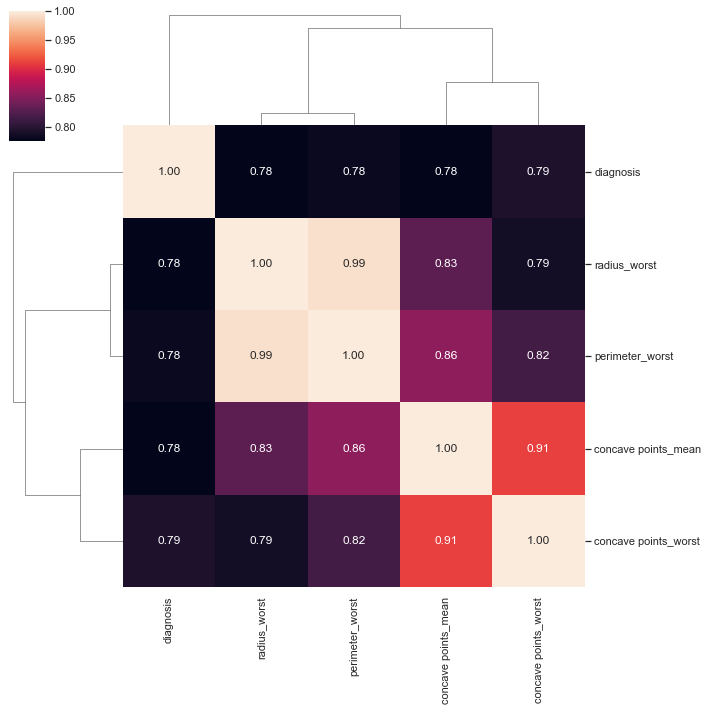

In [49]:
corr_mat = bc.select_dtypes("number").corr()
treshold = 0.75
filter = np.abs(corr_mat["diagnosis"])>treshold
corr_feat = corr_mat.columns[filter].to_list()
sns.clustermap(bc[corr_feat].corr(), annot =True, fmt = ".2f");

In [50]:
columns = X.columns.to_list()

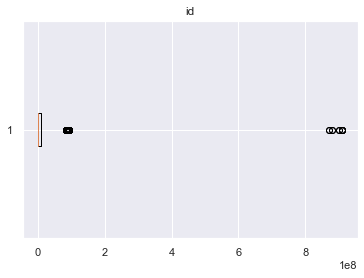

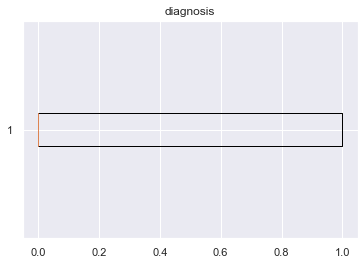

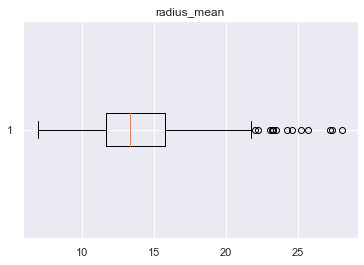

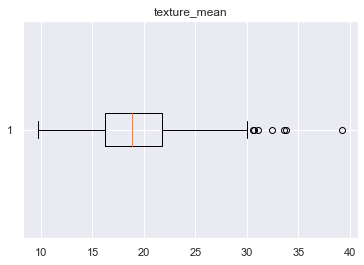

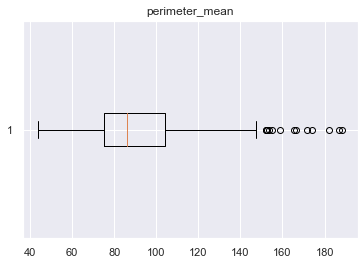

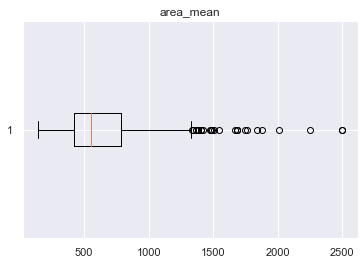

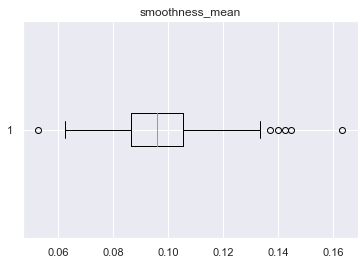

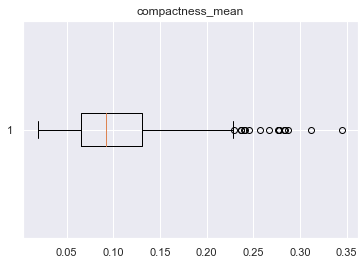

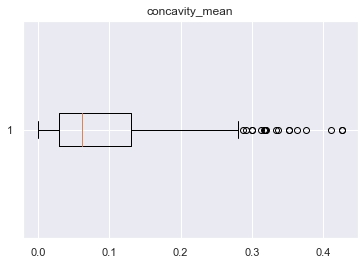

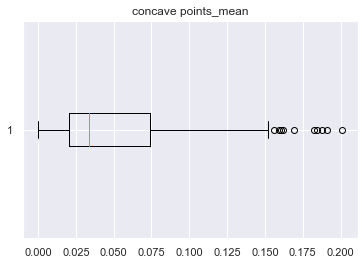

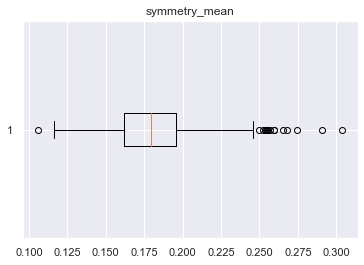

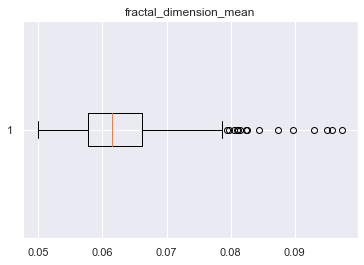

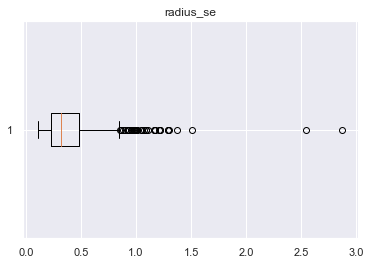

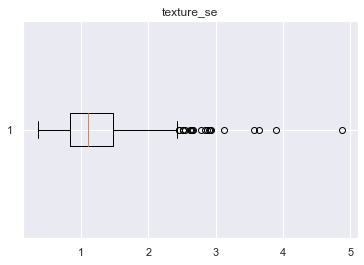

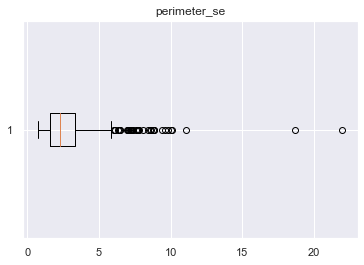

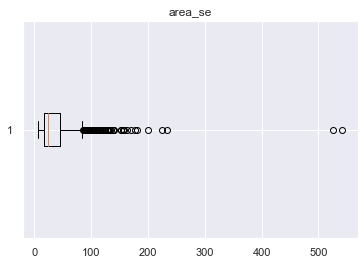

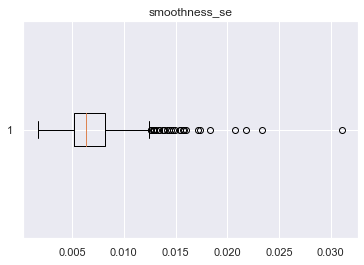

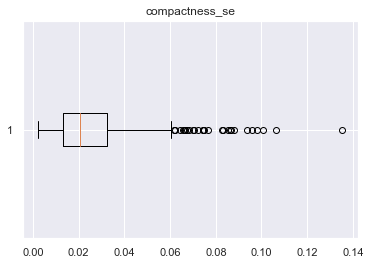

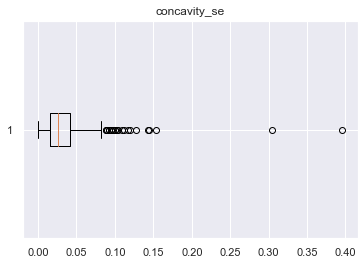

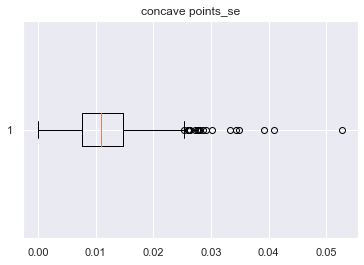

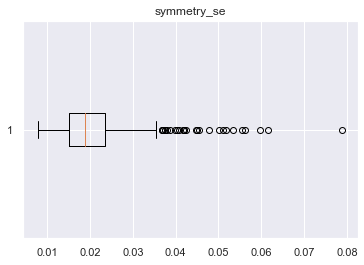

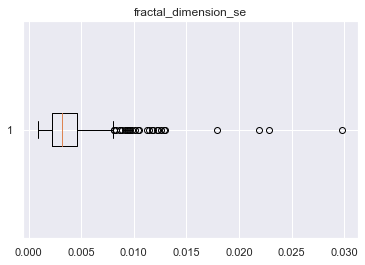

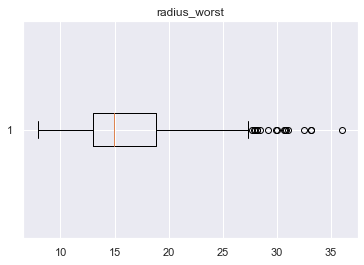

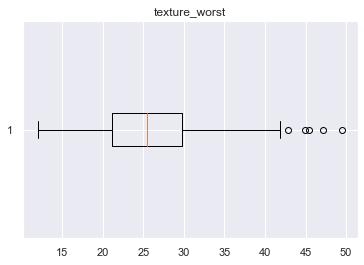

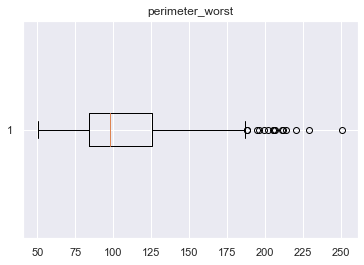

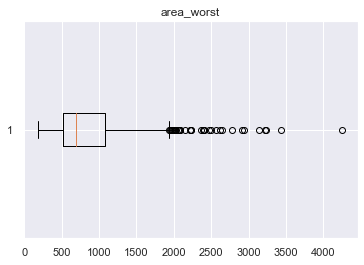

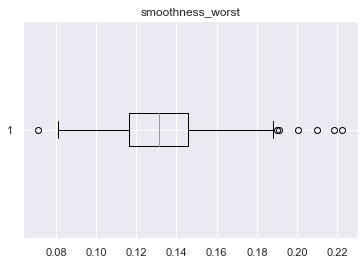

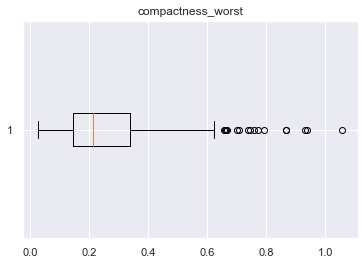

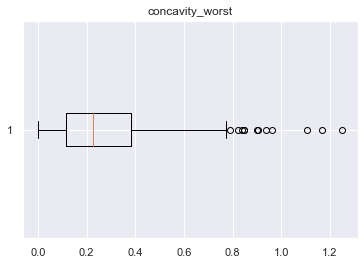

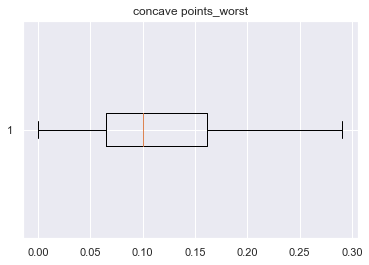

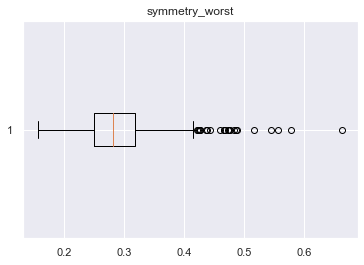

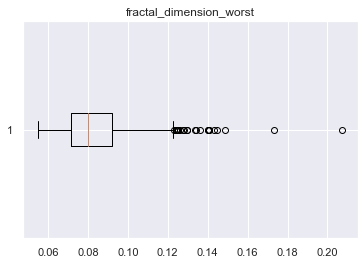

In [51]:
for i in bc.select_dtypes("number").columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.boxplot(bc[i], vert = False);

In [52]:
def outliers(bc, ft):
    Q1 = bc[ft].quantile(0.25)
    Q3 = bc[ft].quantile(0.75)
    IQR = Q3-Q1
    
    low = Q1 - 1.5 * IQR
    top = Q3 + 1.5 * IQR
    
    ls = bc.index[ (bc[ft] < low ) |  (bc[ft]  > top) ]
    return ls

In [53]:
knn = KNeighborsClassifier(n_neighbors = 10, metric='minkowski', weights='distance')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_train)

In [54]:
from sklearn.model_selection import GridSearchCV
def knn_best_params(X_train,X_test,y_train,y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    #to grid search we need to add those values in a dict
    param_grid = dict(n_neighbors = k_range,weights = weight_options)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid, cv = 10, scoring = "accuracy")
    grid.fit(X_train,Y_train)
    print("Best Training Score: {} with parameters {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(X_train,Y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train) #are there any overfitting or underfitting
    
    cm_test = confusion_matrix(Y_test,y_pred_test)
    cm_train = confusion_matrix(Y_train,y_pred_train)
    
    acc_test = accuracy_score(Y_test,y_pred_test)
    acc_train = accuracy_score(Y_train,y_pred_train)
    print("Test Score:{}, Train Score:{}".format(acc_test,acc_train))
    print()
    print("CM Test:", cm_test)
    print("CM Train:", cm_train)
    
    return grid

In [55]:
grid = knn_best_params(X_train,X_test,Y_train,Y_test)


Best Training Score: 0.817342995169082 with parameters {'n_neighbors': 1, 'weights': 'uniform'}

Test Score:0.7807017543859649, Train Score:1.0

CM Test: [[60 11]
 [14 29]]
CM Train: [[286   0]
 [  0 169]]


## Feature Engineering

In [56]:
bc['STAGE'] = 'NULL'

In [57]:
# create a list of our conditions
conditions = [
    (bc['diagnosis'] == 0) & (bc['radius_worst'] <= 15),
    (bc['diagnosis'] == 0) & (bc['radius_worst'] >= 15),
    (bc['diagnosis'] == 1) & (bc['radius_worst'] > 15) & (bc['radius_worst'] <= 20),
    (bc['diagnosis'] == 1) & (bc['radius_worst'] > 20) & (bc['area_worst'] <= 2000),
    (bc['diagnosis'] == 1) & (bc['area_worst'] > 2000)
    ]

# create a list of the values we want to assign for each condition
values = ['Stage-0', 'Stage-1', 'Stage-2', 'Stage-3', 'Stage-4']

# create a new column and use np.select to assign values to it using our lists as arguments
bc['STAGE'] = np.select(conditions, values)

In [58]:
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,STAGE
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Stage-4
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Stage-3
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Stage-3
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Stage-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Stage-4
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Stage-3
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Stage-2
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Stage-3


In [59]:
bc['STAGE'].value_counts()

Stage-0    282
Stage-3     91
Stage-2     84
Stage-1     75
Stage-4     30
0            7
Name: STAGE, dtype: int64

In [60]:
bc['Death Causing'] = 'NULL'

In [61]:
conditions = [
    (bc['STAGE'] == 'Stage-1') & (bc['STAGE'] == 'Stage-0') & (bc['STAGE'] == 'Stage-2'),
    (bc['STAGE'] == 'Stage-3') 
    ]

# create a list of the values we want to assign for each condition
values = ['NO', 'YES']

# create a new column and use np.select to assign values to it using our lists as arguments
bc['Death Causing'] = np.select(conditions, values)

In [62]:
bc['Death Causing'].value_counts()

0      478
YES     91
Name: Death Causing, dtype: int64

In [63]:
bc['Death Causing'] = bc['Death Causing'].replace('YES',1)
bc['Death Causing'].value_counts()

0    478
1     91
Name: Death Causing, dtype: int64

<AxesSubplot:xlabel='Death Causing', ylabel='count'>

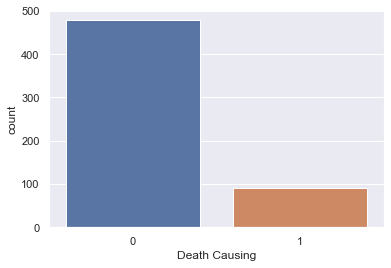

In [64]:
sns.countplot(bc['Death Causing'])

## Kth- Nearest Neighbour Classifier after Feature Engineering

In [65]:
X = bc.drop(["STAGE"], axis=1)  # dropping target feature from rest of features
Y = bc["STAGE"]

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [67]:
knn = KNeighborsClassifier(n_neighbors = 10, metric='minkowski', weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [68]:
Y_pred = knn.predict(X_test)

In [69]:
knn.score(X_train,Y_train)

1.0

In [70]:
knn.score(X_test,Y_test)

0.5350877192982456

In [71]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
     Stage-0       0.64      0.86      0.74        58
     Stage-1       0.50      0.23      0.32        13
     Stage-2       0.31      0.27      0.29        15
     Stage-3       0.29      0.19      0.23        21
     Stage-4       0.00      0.00      0.00         7

    accuracy                           0.54       114
   macro avg       0.29      0.26      0.26       114
weighted avg       0.48      0.54      0.49       114



<AxesSubplot:>

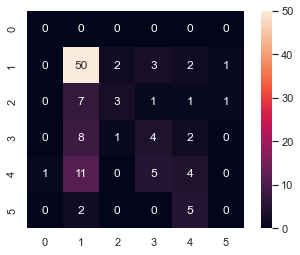

In [72]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,square=True,annot=True)

Minimum error:- 0.21052631578947367 at K = 1


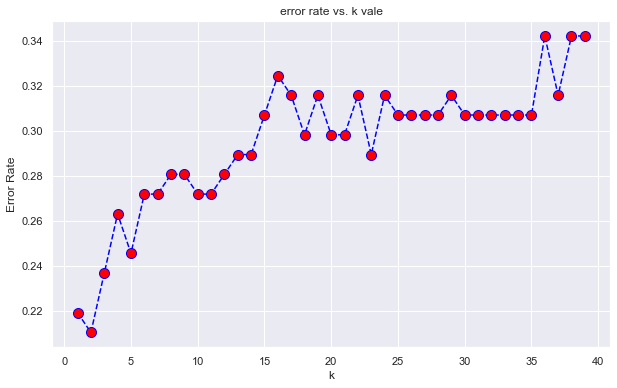

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',
         linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs. k vale')
plt.xlabel('k')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.5789473684210527 at K = 5


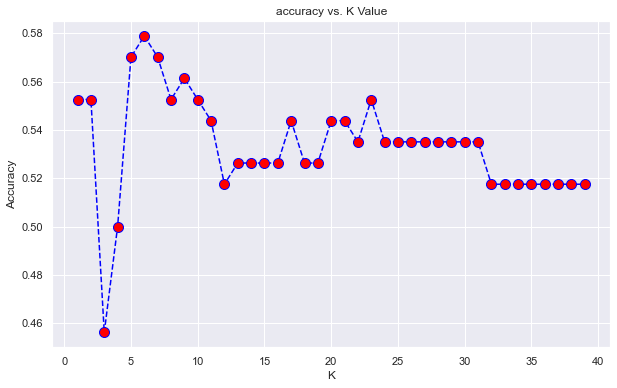

In [74]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle = 'dashed', 
         marker = 'o',markerfacecolor = 'red', markersize = 10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))) 

In [75]:
grid = knn_best_params(X_train,X_test,Y_train,Y_test)


Best Training Score: 0.5426570048309178 with parameters {'n_neighbors': 1, 'weights': 'uniform'}

Test Score:0.5526315789473685, Train Score:1.0

CM Test: [[ 0  0  0  0  0  0]
 [ 1 47  4  3  2  1]
 [ 0  4  5  1  2  1]
 [ 0  6  2  5  2  0]
 [ 1  4  1  9  6  0]
 [ 0  0  1  0  6  0]]
CM Train: [[  7   0   0   0   0   0]
 [  0 224   0   0   0   0]
 [  0   0  62   0   0   0]
 [  0   0   0  69   0   0]
 [  0   0   0   0  70   0]
 [  0   0   0   0   0  23]]
